In [239]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [240]:
car_data=pd.read_csv("cardata.csv")

In [241]:
car_data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [242]:
df=car_data.copy()

In [243]:
df.drop('Model',axis=1,inplace=True)

In [244]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [245]:
ohe= pd.get_dummies(df['Transmission'])

In [246]:
ohe

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2054,0,1
2055,0,1
2056,0,1
2057,1,0


In [247]:
df=pd.concat([df,ohe],axis=1)

In [248]:
df=df.drop('Transmission',axis=1)

In [250]:
df

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,Manual
0,Honda,505000,2017,87150,Petrol,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,0,1
1,Maruti Suzuki,450000,2014,75000,Diesel,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,0,1
2,Hyundai,220000,2011,67000,Petrol,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,0,1
3,Toyota,799000,2019,37500,Petrol,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,0,1
4,Toyota,1950000,2018,69000,Diesel,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,0,1
2055,Hyundai,275000,2014,83000,Petrol,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,0,1
2056,Ford,240000,2013,73000,Petrol,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,0,1
2057,BMW,4290000,2018,60474,Diesel,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,1,0


In [251]:
df.value_counts('Location')

Location
Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Rohtak                1
Siliguri              1
Faizabad              1
Pimpri-Chinchwad      1
Valsad                1
Length: 77, dtype: int64

In [252]:
df['Location'].nunique()

77

In [253]:
df[df['Location']=='Pune']['Price'].mean()

1977763.875

In [254]:
prices=df.groupby('Location')['Price'].mean()

In [255]:
prices

Location
Agra            7.888947e+05
Ahmedabad       1.507257e+06
Allahabad       5.250000e+05
Ambala Cantt    4.183333e+05
Amritsar        4.837500e+05
                    ...     
Valsad          5.800000e+05
Varanasi        5.589583e+05
Warangal        5.150000e+05
Yamunanagar     7.941667e+05
Zirakpur        6.656665e+05
Name: Price, Length: 77, dtype: float64

In [256]:
prices_location_dict= dict(prices)

In [257]:
df['Location']=df['Location'].replace(prices_location_dict)

In [258]:
df

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,Manual
0,Honda,505000,2017,87150,Petrol,1.977764e+06,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,0,1
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,0,1
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,0,1
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,0,1
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,0,1
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,0,1
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,0,1
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,1,0


In [259]:
ohe1= pd.get_dummies(df['Fuel Type'])

In [260]:
df=pd.concat([df,ohe1],axis=1)

In [261]:
df

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,...,Manual,CNG,CNG + CNG,Diesel,Electric,Hybrid,LPG,Petrol,Petrol + CNG,Petrol + LPG
0,Honda,505000,2017,87150,Petrol,1.977764e+06,Grey,First,Corporate,1198 cc,...,1,0,0,0,0,0,0,1,0,0
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,White,Second,Individual,1248 cc,...,1,0,0,1,0,0,0,0,0,0
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,Maroon,First,Individual,1197 cc,...,1,0,0,0,0,0,0,1,0,0
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,Red,First,Individual,1197 cc,...,1,0,0,0,0,0,0,1,0,0
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,Grey,First,Individual,2393 cc,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,White,First,Individual,2179 cc,...,1,0,0,1,0,0,0,0,0,0
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,White,Second,Individual,814 cc,...,1,0,0,0,0,0,0,1,0,0
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,Silver,First,Individual,1196 cc,...,1,0,0,0,0,0,0,1,0,0
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,White,First,Individual,1995 cc,...,0,0,0,1,0,0,0,0,0,0


In [262]:
engine=df['Engine'].str.replace('cc','')

In [263]:
df.drop('Engine',axis=1,inplace=True)

In [264]:
pd.DataFrame(engine)

,Engine
0,1198
1,1248
2,1197
3,1197
4,2393
...,...
2054,2179
2055,814
2056,1196
2057,1995


In [265]:
pd.concat([df,engine],axis=1)

,Make,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Max Power,...,CNG,CNG + CNG,Diesel,Electric,Hybrid,LPG,Petrol,Petrol + CNG,Petrol + LPG,Engine
0,Honda,505000,2017,87150,Petrol,1.977764e+06,Grey,First,Corporate,87 bhp @ 6000 rpm,...,0,0,0,0,0,0,1,0,0,1198
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,White,Second,Individual,74 bhp @ 4000 rpm,...,0,0,1,0,0,0,0,0,0,1248
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,Maroon,First,Individual,79 bhp @ 6000 rpm,...,0,0,0,0,0,0,1,0,0,1197
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,Red,First,Individual,82 bhp @ 6000 rpm,...,0,0,0,0,0,0,1,0,0,1197
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,Grey,First,Individual,148 bhp @ 3400 rpm,...,0,0,1,0,0,0,0,0,0,2393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,White,First,Individual,138 bhp @ 3750 rpm,...,0,0,1,0,0,0,0,0,0,2179
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,White,Second,Individual,55 bhp @ 5500 rpm,...,0,0,0,0,0,0,1,0,0,814
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,Silver,First,Individual,70 bhp @ 6250 rpm,...,0,0,0,0,0,0,1,0,0,1196
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,White,First,Individual,188 bhp @ 4000 rpm,...,0,0,1,0,0,0,0,0,0,1995


In [266]:
ohe2= pd.get_dummies(df['Color'])

In [267]:
df.drop('Color',axis=1,inplace=True)

In [268]:
pd.concat([df,ohe2],axis=1)

,Make,Price,Year,Kilometer,Fuel Type,Location,Owner,Seller Type,Max Power,Max Torque,...,Grey,Maroon,Orange,Others,Pink,Purple,Red,Silver,White,Yellow
0,Honda,505000,2017,87150,Petrol,1.977764e+06,First,Corporate,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,...,1,0,0,0,0,0,0,0,0,0
1,Maruti Suzuki,450000,2014,75000,Diesel,1.475745e+06,Second,Individual,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,...,0,0,0,0,0,0,0,0,1,0
2,Hyundai,220000,2011,67000,Petrol,9.643333e+05,First,Individual,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,...,0,1,0,0,0,0,0,0,0,0
3,Toyota,799000,2019,37500,Petrol,7.424000e+05,First,Individual,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,...,0,0,0,0,0,0,1,0,0,0
4,Toyota,1950000,2018,69000,Diesel,1.721570e+06,First,Individual,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,2.980400e+06,First,Individual,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,...,0,0,0,0,0,0,0,0,1,0
2055,Hyundai,275000,2014,83000,Petrol,1.507257e+06,Second,Individual,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,...,0,0,0,0,0,0,0,0,1,0
2056,Ford,240000,2013,73000,Petrol,1.149000e+06,First,Individual,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,...,0,0,0,0,0,0,0,1,0,0
2057,BMW,4290000,2018,60474,Diesel,1.385207e+06,First,Individual,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,...,0,0,0,0,0,0,0,0,1,0


In [269]:
df.columns

Index(['Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Location', 'Owner',
       'Seller Type', 'Max Power', 'Max Torque', 'Drivetrain', 'Length',
       'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity',
       'Automatic', 'Manual', 'CNG', 'CNG + CNG', 'Diesel', 'Electric',
       'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG', 'Petrol + LPG'],
      dtype='object')

In [270]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder() 


In [271]:
owner=pd.DataFrame(label_encoder.fit_transform(df['Owner'].map({'First':6,'Second':5,'Third':4,'Fourth':3,'4 or More':2,'UnRegistered Car':1})))

In [272]:
df.drop('Owner',axis=1,inplace=True)

In [273]:
owner

,0
0,5
1,4
2,5
3,5
4,5
...,...
2054,5
2055,4
2056,5
2057,5


In [274]:
owner.columns= ['owner_encoded']

In [275]:
df=pd.concat([df,owner],axis=1)

In [276]:
df['owner_encoded']

0       5
1       4
2       5
3       5
4       5
       ..
2054    5
2055    4
2056    5
2057    5
2058    5
Name: owner_encoded, Length: 2059, dtype: int64

In [277]:
df.drop('Fuel Type',axis=1,inplace=True)

In [278]:
df.drop('Make',axis=1,inplace=True)

In [279]:
df.columns = df.columns.str.strip()

In [280]:
df['Seller Type']

0        Corporate
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
2054    Individual
2055    Individual
2056    Individual
2057    Individual
2058    Individual
Name: Seller Type, Length: 2059, dtype: object

In [281]:
Seller=pd.get_dummies(df['Seller Type'])

In [282]:
df=pd.concat([df,Seller],axis=1)

In [283]:
df.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Seller Type', 'Max Power',
       'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Automatic', 'Manual', 'CNG',
       'CNG + CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol',
       'Petrol + CNG', 'Petrol + LPG', 'owner_encoded',
       'Commercial Registration', 'Corporate', 'Individual'],
      dtype='object')

In [284]:
drive=pd.get_dummies(df['Drivetrain'])

In [285]:
df=pd.concat([df,drive],axis=1)

In [286]:
df.drop('Drivetrain',axis=1,inplace=True)

In [287]:
import pandas as pd
import re
import numpy as np

# Function to extract torque and RPM, then compute power
def compute_power(torque_str):
    if isinstance(torque_str, str):  # Check if the input is a string
        match = re.search(r'(\d+\.?\d*) Nm @ (\d+\.?\d*) rpm', torque_str)
        if match:
            torque = float(match.group(1))  # Torque in Nm
            rpm = float(match.group(2))  # RPM
            # Calculate power using the formula: Power (W) = Torque (Nm) * RPM * 2π / 60
            power_watts = torque * rpm * (2 * np.pi) / 60
            # Convert power to horsepower (1 hp = 745.7 W)
            power_hp = power_watts / 745.7
            return power_hp
    return None  # Return None if input is not a valid string

# Assuming df is your DataFrame, apply the function
df['Combined_Power_hp'] = df['Max Torque'].apply(compute_power)

# Display the DataFrame with the new column
print(df[['Max Torque', 'Combined_Power_hp']])



                  Max Torque  Combined_Power_hp
0          109 Nm @ 4500 rpm          68.881641
1          190 Nm @ 2000 rpm          53.363963
2     112.7619 Nm @ 4000 rpm          63.341282
3          113 Nm @ 4200 rpm          66.648781
4          343 Nm @ 1400 rpm          67.435197
...                      ...                ...
2054       330 Nm @ 1600 rpm          74.147822
2055        75 Nm @ 4000 rpm          42.129444
2056       102 Nm @ 4000 rpm          57.296044
2057       400 Nm @ 1750 rpm          98.302036
2058       195 Nm @ 1400 rpm          38.337794

[2059 rows x 2 columns]


In [288]:
df['Combined_Power_hp'].isna().sum()

208

In [289]:
df['Combined_Power_hp'].fillna(df['Combined_Power_hp'].mean(),inplace=True)

In [290]:
df['Combined_Power_hp'].isna().sum()

0

In [291]:
df.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Seller Type', 'Max Power',
       'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Automatic', 'Manual', 'CNG', 'CNG + CNG',
       'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG',
       'Petrol + LPG', 'owner_encoded', 'Commercial Registration', 'Corporate',
       'Individual', 'AWD', 'FWD', 'RWD', 'Combined_Power_hp'],
      dtype='object')

In [292]:
df.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Seller Type', 'Max Power',
       'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Automatic', 'Manual', 'CNG', 'CNG + CNG',
       'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG',
       'Petrol + LPG', 'owner_encoded', 'Commercial Registration', 'Corporate',
       'Individual', 'AWD', 'FWD', 'RWD', 'Combined_Power_hp'],
      dtype='object')

In [293]:
import re
import pandas as pd

# Function to combine power and RPM into a ratio
def combine_power_RPM(power_str):
    if isinstance(power_str, str):  # Check if the input is a string
        match = re.search(r'(\d+\.?\d*) bhp @ (\d+\.?\d*) rpm', power_str)
        if match:
            power = float(match.group(1))  # Extract power in bhp
            rpm = float(match.group(2))  # Extract RPM
            ratio = power / rpm  # Calculate the ratio of power to RPM
            return ratio
    elif isinstance(power_str, float):  # If it's already a float, return it as is
        return power_str
    return None  # Return None if input doesn't match the expected pattern

# Apply the function to the 'Max Power' column and directly assign to a new 'ratio' column
df['power_rpm_ratio'] = df['Max Power'].apply(combine_power_RPM)

# Display the DataFrame with the new 'ratio' column
print(df[['Max Power', 'power_rpm_ratio']])

        
    

               Max Power  power_rpm_ratio
0      87 bhp @ 6000 rpm         0.014500
1      74 bhp @ 4000 rpm         0.018500
2      79 bhp @ 6000 rpm         0.013167
3      82 bhp @ 6000 rpm         0.013667
4     148 bhp @ 3400 rpm         0.043529
...                  ...              ...
2054  138 bhp @ 3750 rpm         0.036800
2055   55 bhp @ 5500 rpm         0.010000
2056   70 bhp @ 6250 rpm         0.011200
2057  188 bhp @ 4000 rpm         0.047000
2058   70 bhp @ 3600 rpm         0.019444

[2059 rows x 2 columns]


In [294]:
df_new=df

In [295]:
df_new=df_new.drop('Max Power',axis=1)

In [296]:
df_new=df_new.drop('Max Torque',axis=1)

In [297]:
df_new

,Price,Year,Kilometer,Location,Seller Type,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Petrol + LPG,owner_encoded,Commercial Registration,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio
0,505000,2017,87150,1.977764e+06,Corporate,3990.0,1680.0,1505.0,5.0,35.0,...,0,5,0,1,0,0,1,0,68.881641,0.014500
1,450000,2014,75000,1.475745e+06,Individual,3995.0,1695.0,1555.0,5.0,42.0,...,0,4,0,0,1,0,1,0,53.363963,0.018500
2,220000,2011,67000,9.643333e+05,Individual,3585.0,1595.0,1550.0,5.0,35.0,...,0,5,0,0,1,0,1,0,63.341282,0.013167
3,799000,2019,37500,7.424000e+05,Individual,3995.0,1745.0,1510.0,5.0,37.0,...,0,5,0,0,1,0,1,0,66.648781,0.013667
4,1950000,2018,69000,1.721570e+06,Individual,4735.0,1830.0,1795.0,7.0,55.0,...,0,5,0,0,1,0,0,1,67.435197,0.043529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,Individual,4585.0,1890.0,1785.0,7.0,70.0,...,0,5,0,0,1,0,1,0,74.147822,0.036800
2055,275000,2014,83000,1.507257e+06,Individual,3495.0,1550.0,1500.0,5.0,32.0,...,0,4,0,0,1,0,1,0,42.129444,0.010000
2056,240000,2013,73000,1.149000e+06,Individual,3795.0,1680.0,1427.0,5.0,45.0,...,0,5,0,0,1,0,1,0,57.296044,0.011200
2057,4290000,2018,60474,1.385207e+06,Individual,4936.0,1868.0,1479.0,5.0,65.0,...,0,5,0,0,1,0,0,1,98.302036,0.047000


In [298]:
Seller=pd.get_dummies(df['Seller Type'])

In [299]:
df_new=pd.concat([df_new,Seller],axis=1)

In [300]:
df_new=df_new.drop('Seller Type',axis=1)

In [301]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,2017,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.0,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,2014,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.0,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,2011,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.0,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,2019,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.0,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,2018,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.0,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.0,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,2014,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.0,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,2013,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.0,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,2018,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.0,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


In [302]:
df_new.dtypes

Price                        int64
Year                         int64
Kilometer                    int64
Location                   float64
Length                     float64
Width                      float64
Height                     float64
Seating Capacity           float64
Fuel Tank Capacity         float64
Automatic                    uint8
Manual                       uint8
CNG                          uint8
CNG + CNG                    uint8
Diesel                       uint8
Electric                     uint8
Hybrid                       uint8
LPG                          uint8
Petrol                       uint8
Petrol + CNG                 uint8
Petrol + LPG                 uint8
owner_encoded                int64
Commercial Registration      uint8
Corporate                    uint8
Individual                   uint8
AWD                          uint8
FWD                          uint8
RWD                          uint8
Combined_Power_hp          float64
power_rpm_ratio     

In [303]:
df_new['Location']

0       1.977764e+06
1       1.475745e+06
2       9.643333e+05
3       7.424000e+05
4       1.721570e+06
            ...     
2054    2.980400e+06
2055    1.507257e+06
2056    1.149000e+06
2057    1.385207e+06
2058    8.400000e+05
Name: Location, Length: 2059, dtype: float64

In [304]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,2017,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.0,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,2014,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.0,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,2011,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.0,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,2019,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.0,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,2018,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.0,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.0,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,2014,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.0,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,2013,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.0,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,2018,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.0,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


In [305]:
import matplotlib.pyplot as plt

In [306]:
correlation=df_new.corr()

In [307]:
correlation

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
Price,1.000000,0.311400,-0.150825,0.290479,0.556741,0.563996,0.075080,-0.038524,0.584631,0.476843,...,0.096228,-0.085427,0.417658,-0.447695,0.257612,5.651558e-01,0.694660,-0.024146,0.096228,-0.085427
Year,0.311400,1.000000,-0.296547,0.164815,0.098770,0.195493,0.116102,-0.006366,0.064512,0.171883,...,0.031471,-0.036021,0.090118,0.075548,0.034013,-2.460282e-02,0.074855,0.020167,0.031471,-0.036021
Kilometer,-0.150825,-0.296547,1.000000,-0.105969,0.047705,0.017462,0.093592,0.125244,0.055975,-0.104907,...,-0.028835,0.028340,0.000483,-0.036722,0.007502,-4.010046e-03,0.031178,-0.002281,-0.028835,0.028340
Location,0.290479,0.164815,-0.105969,1.000000,0.286990,0.278755,-0.043246,-0.048631,0.255596,0.356806,...,0.017300,0.006741,0.136763,-0.133311,0.091389,2.616847e-01,0.286901,-0.081072,0.017300,0.006741
Length,0.556741,0.098770,0.047705,0.286990,1.000000,0.807054,0.185451,0.295149,0.813010,0.545838,...,0.090696,-0.073306,0.354836,-0.525452,0.398059,5.960987e-01,0.841072,-0.045991,0.090696,-0.073306
Width,0.563996,0.195493,0.017462,0.278755,0.807054,1.000000,0.296702,0.221689,0.793868,0.527580,...,0.070017,-0.058145,0.492464,-0.539211,0.304300,5.632394e-01,0.797142,-0.030243,0.070017,-0.058145
Height,0.075080,0.116102,0.093592,-0.043246,0.185451,0.296702,1.000000,0.695761,0.400884,-0.060581,...,-0.026354,0.024151,0.406160,-0.447776,0.162539,4.978058e-02,0.270656,0.003708,-0.026354,0.024151
Seating Capacity,-0.038524,-0.006366,0.125244,-0.048631,0.295149,0.221689,0.695761,1.000000,0.318043,-0.045128,...,-0.039601,0.036248,0.146961,-0.351005,0.293242,2.573141e-02,0.227607,0.005716,-0.039601,0.036248
Fuel Tank Capacity,0.584631,0.064512,0.055975,0.255596,0.813010,0.793868,0.400884,0.318043,1.000000,0.508928,...,0.062150,-0.052486,0.541535,-0.654651,0.379797,6.002411e-01,0.839012,-0.023526,0.062150,-0.052486
Automatic,0.476843,0.171883,-0.104907,0.356806,0.545838,0.527580,-0.060581,-0.045128,0.508928,1.000000,...,0.103335,-0.086358,0.333518,-0.365721,0.211631,4.213865e-01,0.588244,-0.044604,0.103335,-0.086358


In [308]:
df_new.fillna(df.mean(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_49904\2506378728.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.fillna(df.mean(), inplace=True)


In [309]:
df_new.isna().sum()

Price                      0
Year                       0
Kilometer                  0
Location                   0
Length                     0
Width                      0
Height                     0
Seating Capacity           0
Fuel Tank Capacity         0
Automatic                  0
Manual                     0
CNG                        0
CNG + CNG                  0
Diesel                     0
Electric                   0
Hybrid                     0
LPG                        0
Petrol                     0
Petrol + CNG               0
Petrol + LPG               0
owner_encoded              0
Commercial Registration    0
Corporate                  0
Individual                 0
AWD                        0
FWD                        0
RWD                        0
Combined_Power_hp          0
power_rpm_ratio            0
Commercial Registration    0
Corporate                  0
Individual                 0
dtype: int64

In [310]:
correlation= df_new.corr()

In [311]:
correlation

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
Price,1.000000,0.311400,-0.150825,0.290479,5.526676e-01,5.598695e-01,7.453035e-02,-3.824188e-02,5.624226e-01,0.476843,...,0.096228,-0.085427,0.417658,-0.447695,0.257612,5.651558e-01,6.811430e-01,-0.024146,0.096228,-0.085427
Year,0.311400,1.000000,-0.296547,0.164815,9.353423e-02,1.851292e-01,1.099471e-01,-6.028858e-03,6.054809e-02,0.171883,...,0.031471,-0.036021,0.090118,0.075548,0.034013,-2.460282e-02,6.038587e-02,0.020167,0.031471,-0.036021
Kilometer,-0.150825,-0.296547,1.000000,-0.105969,4.747267e-02,1.737667e-02,9.313621e-02,1.246340e-01,5.541805e-02,-0.104907,...,-0.028835,0.028340,0.000483,-0.036722,0.007502,-4.010046e-03,3.030939e-02,-0.002281,-0.028835,0.028340
Location,0.290479,0.164815,-0.105969,1.000000,2.825975e-01,2.744885e-01,-4.258414e-02,-4.788689e-02,2.494140e-01,0.356806,...,0.017300,0.006741,0.136763,-0.133311,0.091389,2.616847e-01,2.712771e-01,-0.081072,0.017300,0.006741
Length,0.552668,0.093534,0.047473,0.282598,1.000000e+00,8.070535e-01,1.854512e-01,2.951490e-01,7.994666e-01,0.537109,...,0.088305,-0.071530,0.353968,-0.509844,0.396878,5.960987e-01,7.985781e-01,-0.045989,0.088305,-0.071530
Width,0.559870,0.185129,0.017377,0.274488,8.070535e-01,1.000000e+00,2.967023e-01,2.216894e-01,7.718030e-01,0.519143,...,0.068171,-0.056736,0.491260,-0.523193,0.303397,5.632394e-01,7.590496e-01,-0.030242,0.068171,-0.056736
Height,0.074530,0.109947,0.093136,-0.042584,1.854512e-01,2.967023e-01,1.000000e+00,6.957606e-01,3.922911e-01,-0.059612,...,-0.025659,0.023566,0.405167,-0.434475,0.162057,4.978058e-02,2.600774e-01,0.003708,-0.025659,0.023566
Seating Capacity,-0.038242,-0.006029,0.124634,-0.047887,2.951490e-01,2.216894e-01,6.957606e-01,1.000000e+00,3.113732e-01,-0.044407,...,-0.038557,0.035370,0.146602,-0.340579,0.292372,2.573141e-02,2.180395e-01,0.005716,-0.038557,0.035370
Fuel Tank Capacity,0.562423,0.060548,0.055418,0.249414,7.994666e-01,7.718030e-01,3.922911e-01,3.113732e-01,1.000000e+00,0.493361,...,0.059944,-0.050773,0.522908,-0.621918,0.368540,5.645994e-01,7.813766e-01,-0.023524,0.059944,-0.050773
Automatic,0.476843,0.171883,-0.104907,0.356806,5.371092e-01,5.191431e-01,-5.961175e-02,-4.440675e-02,4.933609e-01,1.000000,...,0.103335,-0.086358,0.333518,-0.365721,0.211631,4.213865e-01,5.580504e-01,-0.044604,0.103335,-0.086358


In [312]:
corr_with_price=correlation['Price']

In [313]:
variables_high_corr= correlation[corr_with_price>0.4].index.tolist()

In [314]:
variables_high_corr

['Price',
 'Length',
 'Width',
 'Fuel Tank Capacity',
 'Automatic',
 'AWD',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [315]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,2017,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.00000,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,2014,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.00000,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,2011,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.00000,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,2019,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.00000,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,2018,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.00000,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,2016,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.00000,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,2014,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.00000,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,2013,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.00000,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,2018,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.00000,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


In [316]:
df_new['Year']=(2024-df_new['Year'])

In [317]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,7,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.00000,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,10,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.00000,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,13,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.00000,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,5,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.00000,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,6,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.00000,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.00000,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,10,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.00000,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,11,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.00000,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,6,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.00000,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


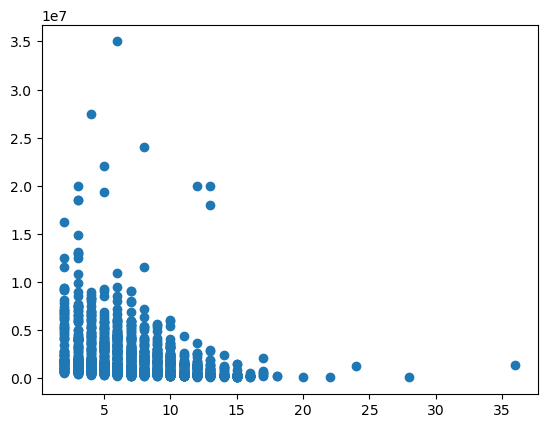

In [318]:

plt.scatter(df_new['Year'],df_new['Price'])

In [319]:
correlation.loc['Price','Year']

0.31139953589272346

In [320]:
corr=df_new.corr()

In [321]:
numeric_features= df_new.select_dtypes(['int64','float64'])

In [322]:
numeric_features.columns

Index(['Price', 'Year', 'Kilometer', 'Location', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'owner_encoded',
       'Combined_Power_hp', 'power_rpm_ratio'],
      dtype='object')

In [323]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,7,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.00000,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,10,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.00000,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,13,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.00000,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,5,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.00000,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,6,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.00000,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.00000,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,10,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.00000,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,11,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.00000,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,6,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.00000,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


In [ ]:
df_new_scaled

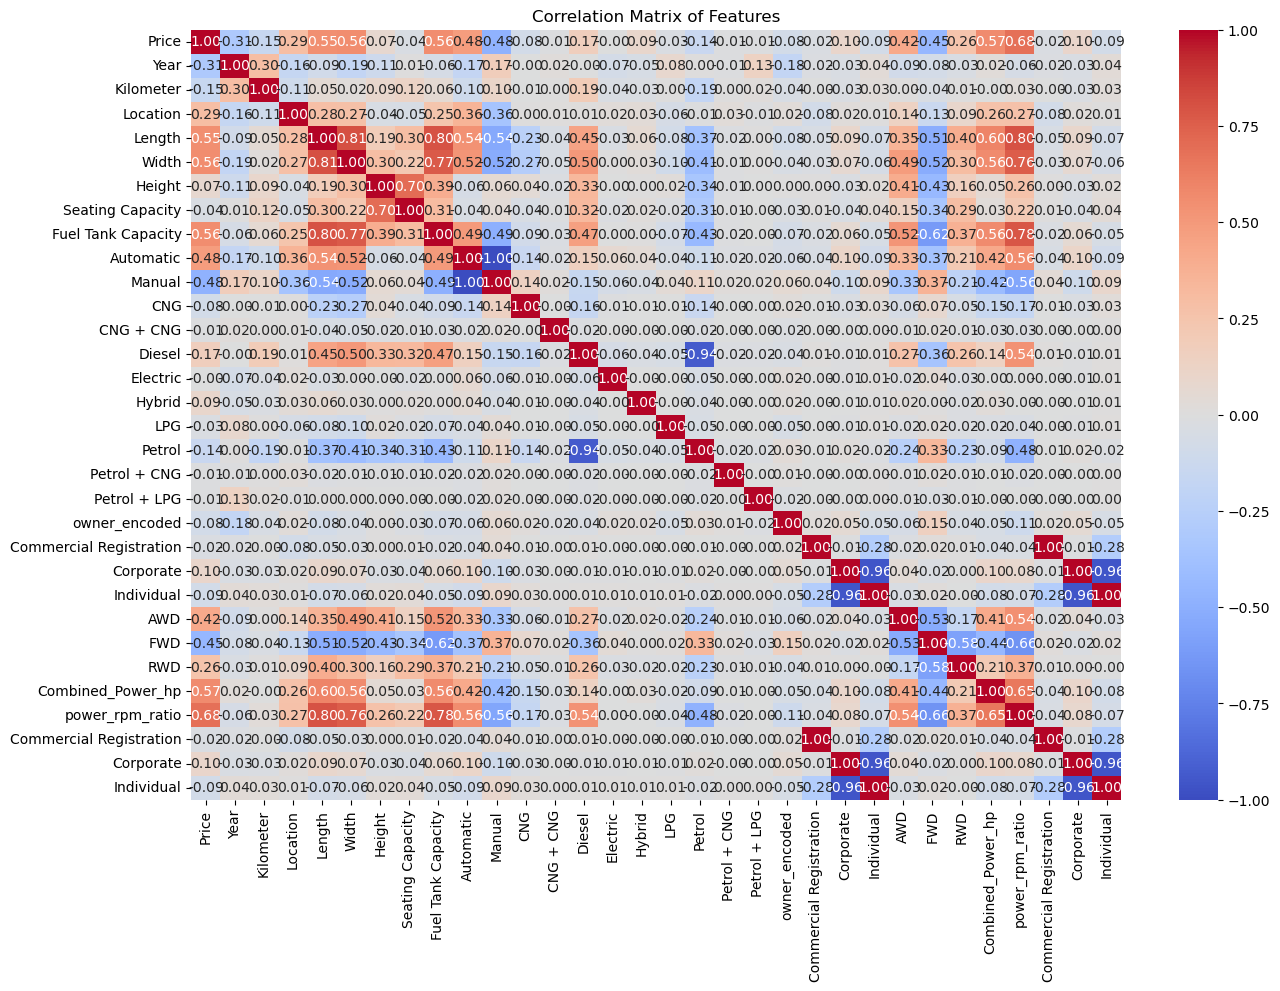

In [324]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

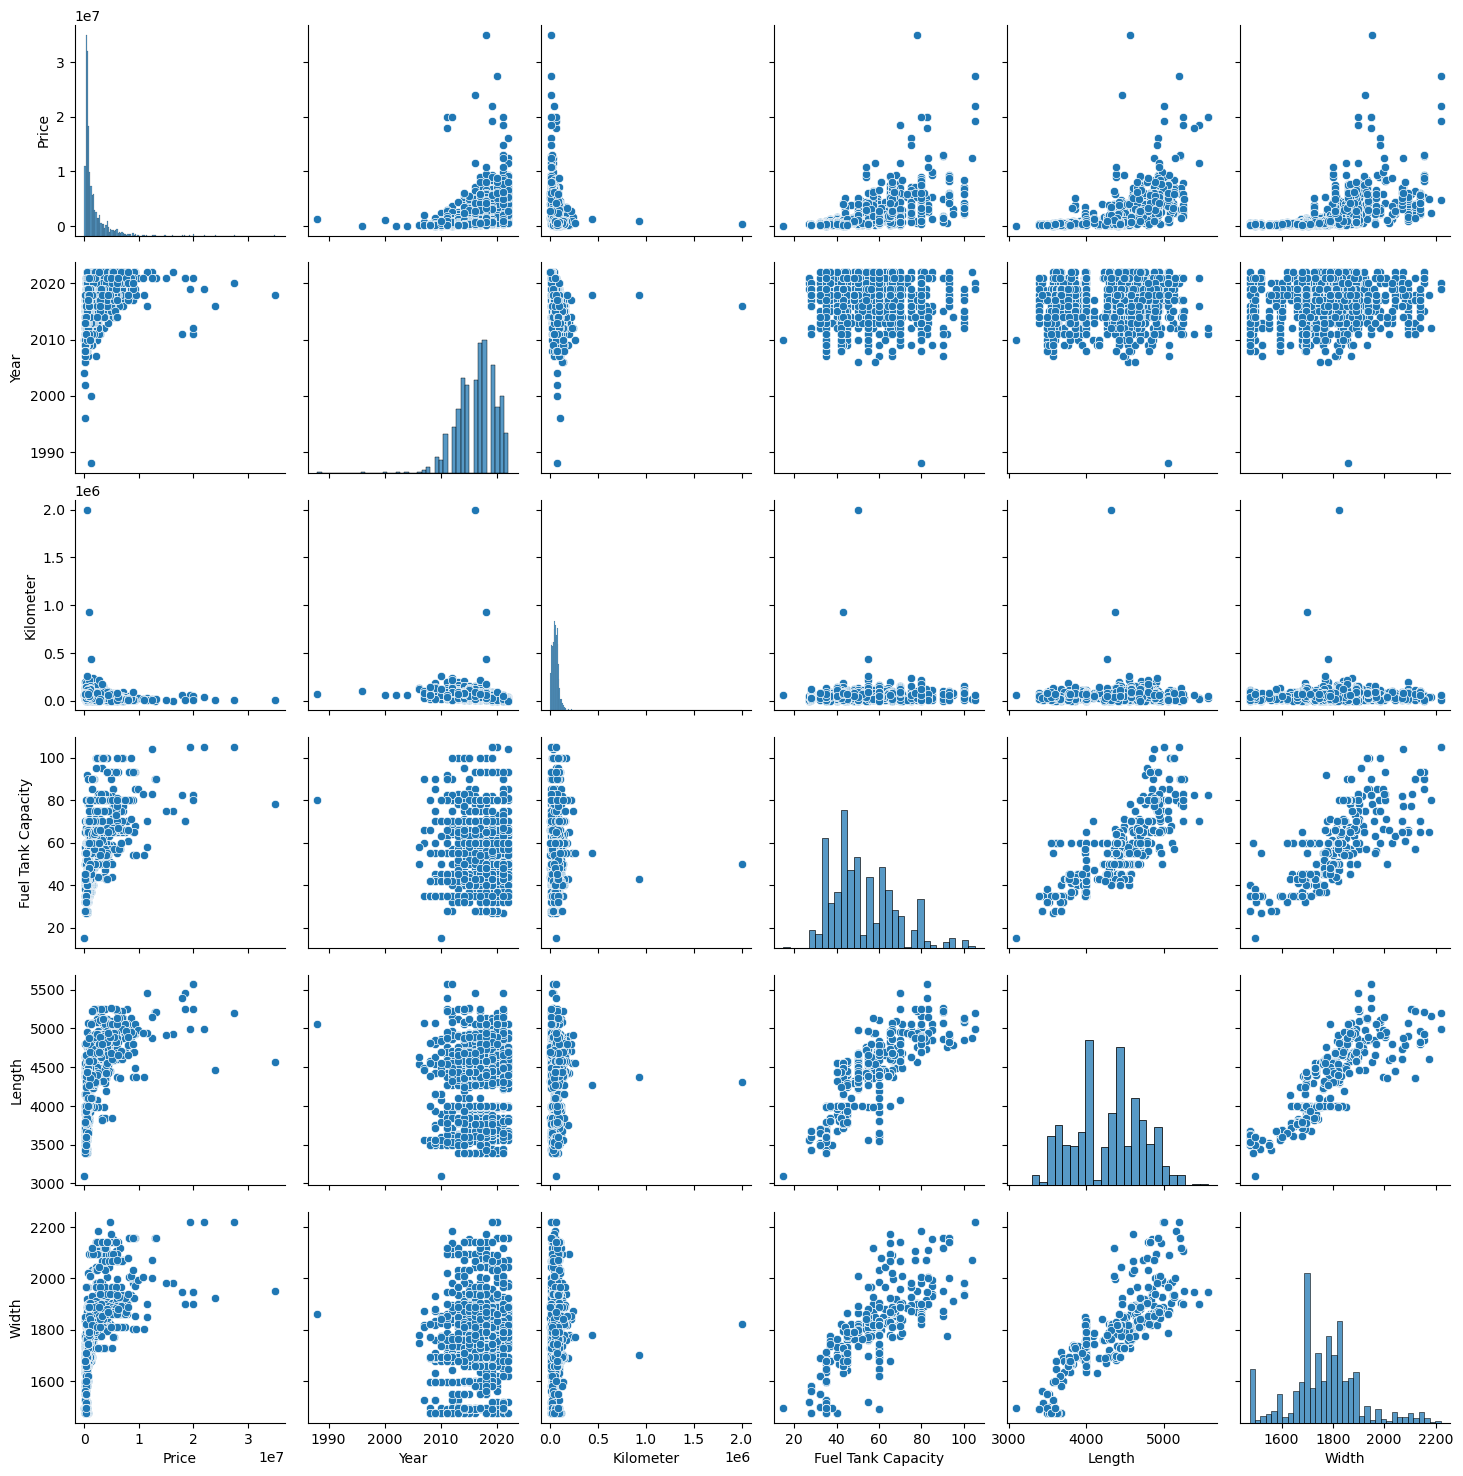

In [328]:
sns.pairplot(df[['Price', 'Year', 'Kilometer', 'Fuel Tank Capacity', 'Length', 'Width']])
plt.show()

In [329]:
numerical_features=df_new.select_dtypes(include=['number']).columns.tolist()

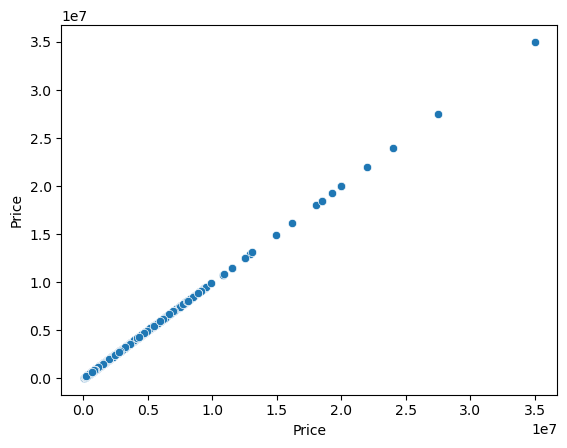

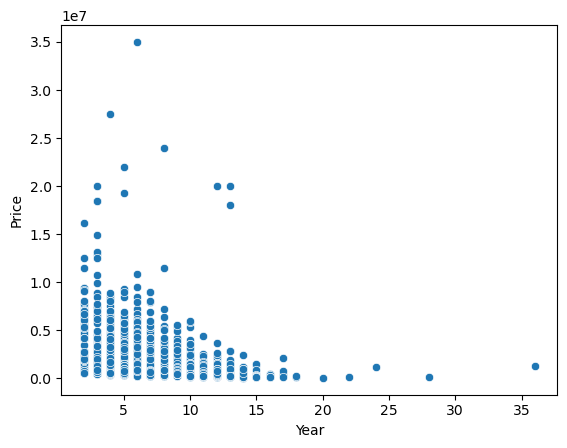

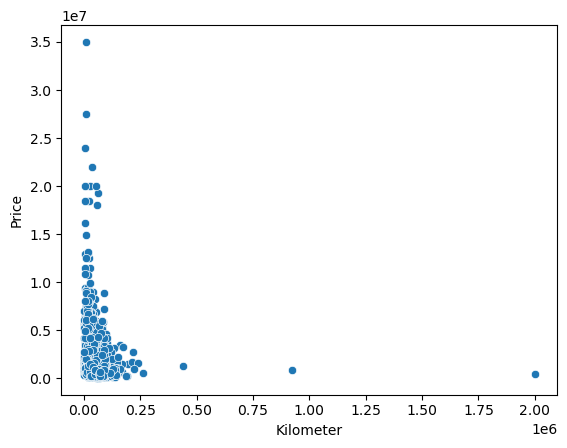

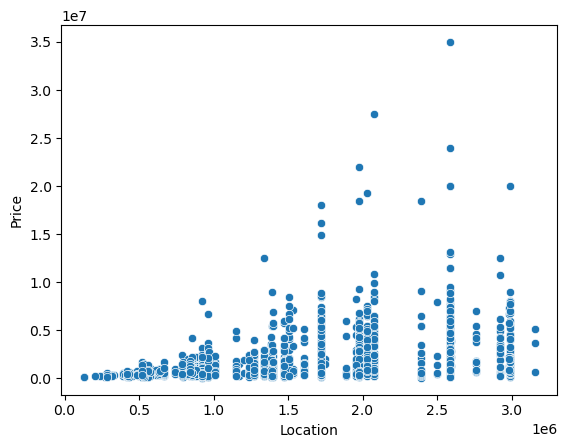

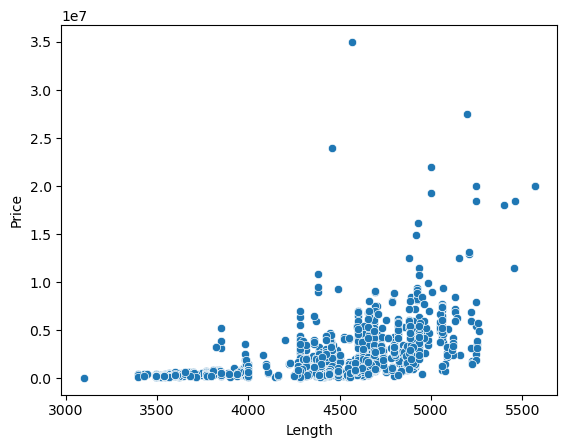

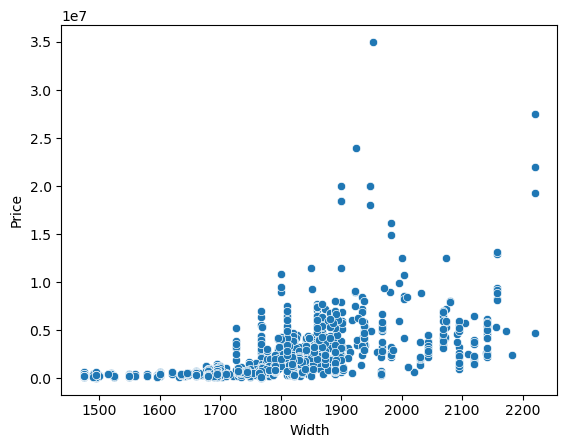

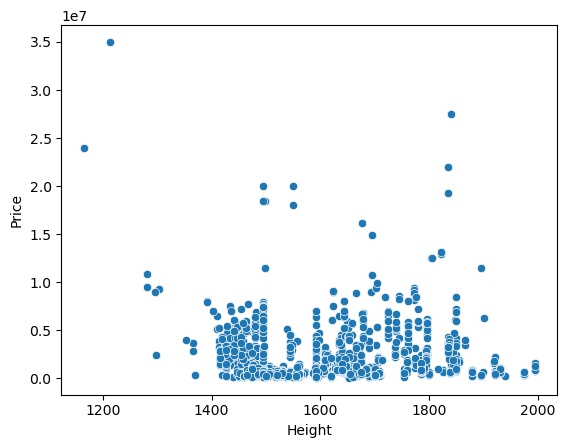

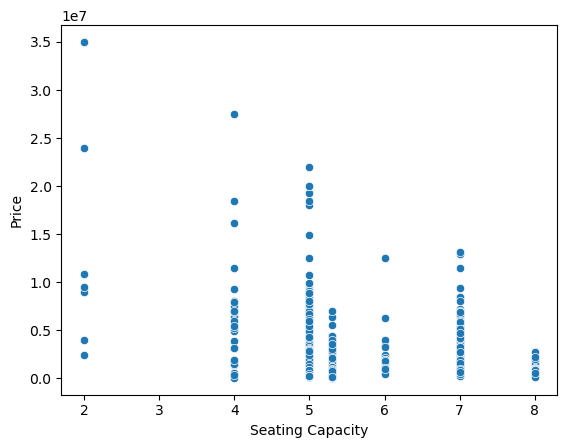

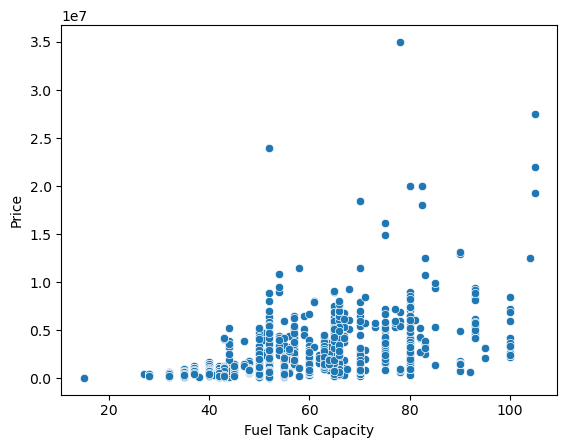

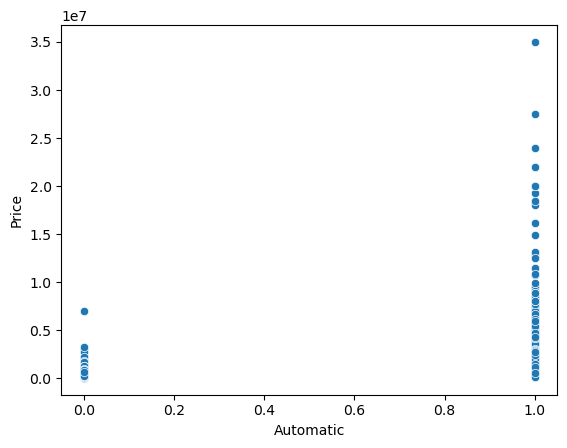

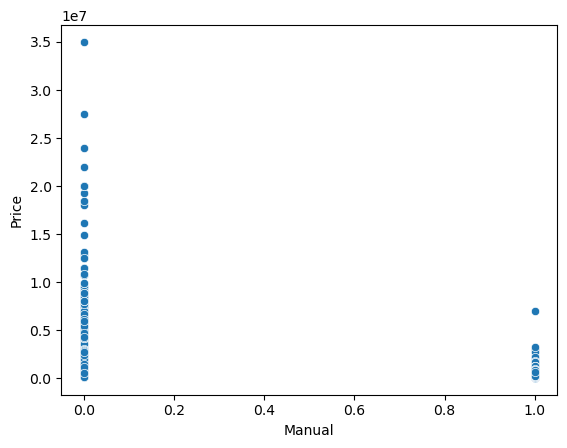

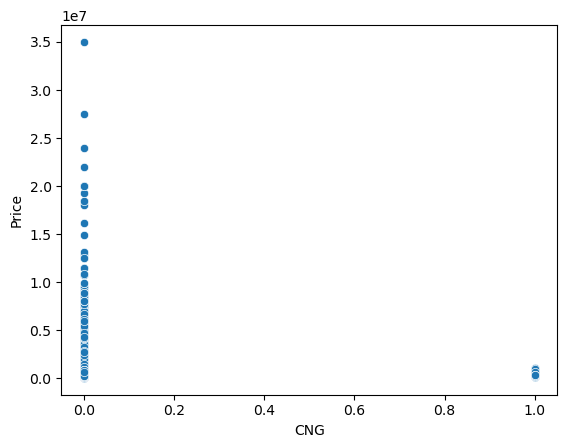

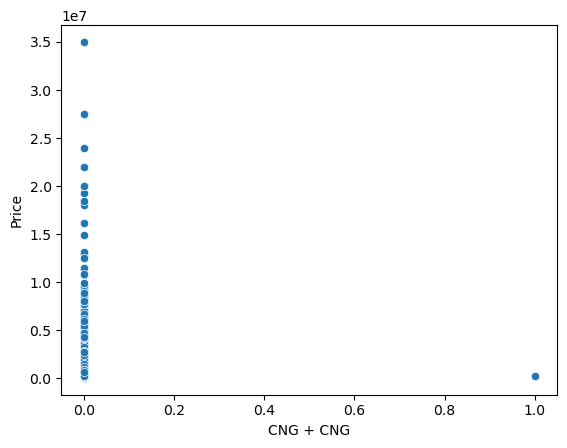

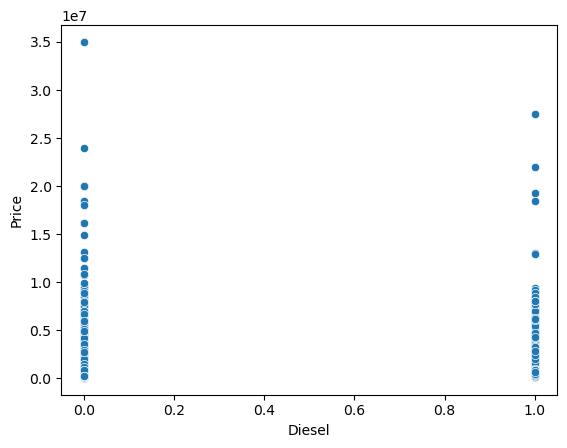

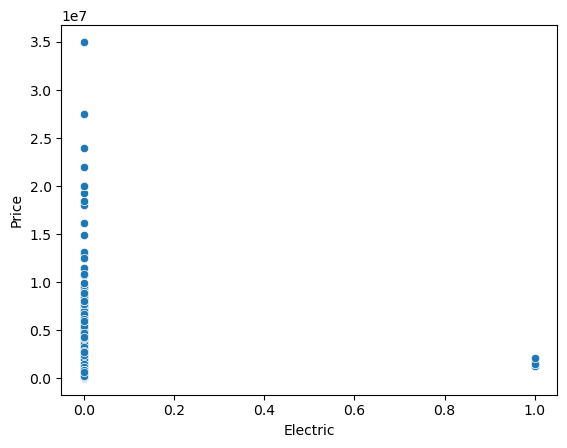

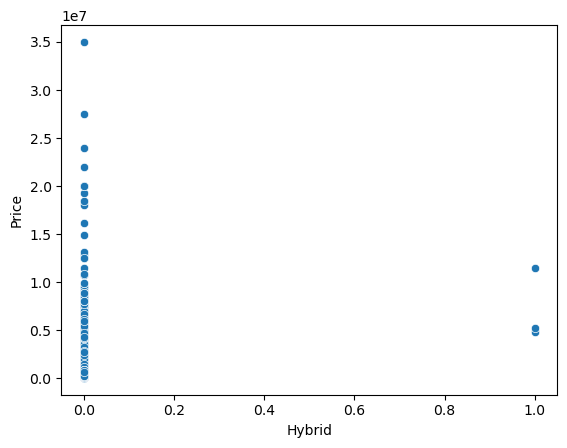

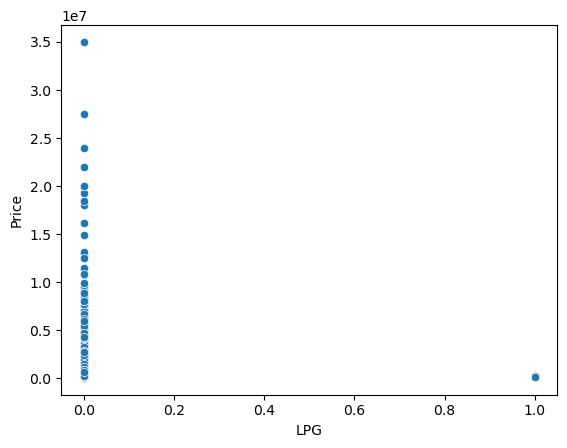

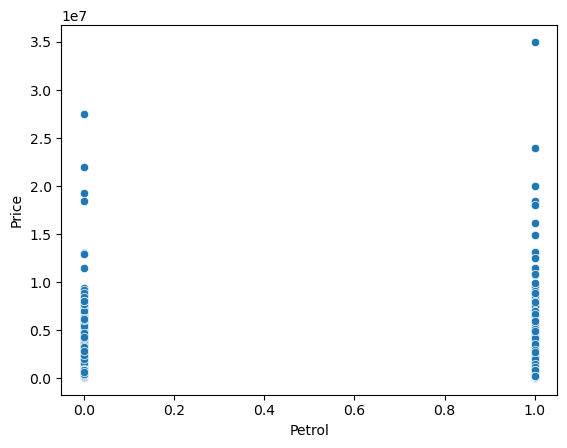

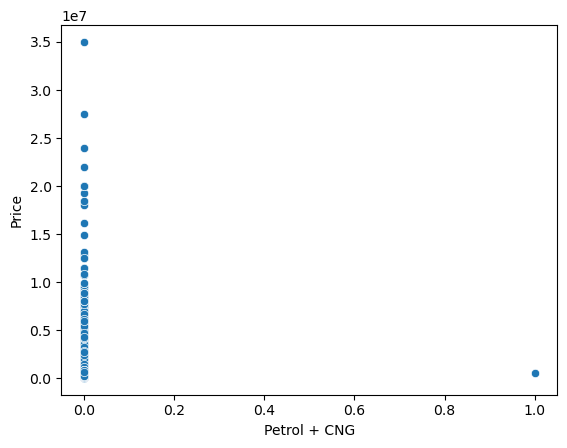

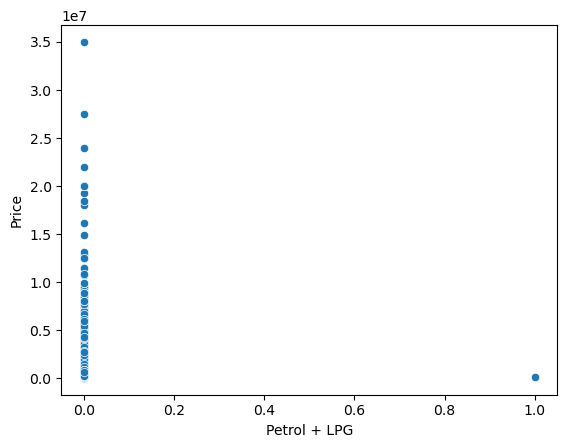

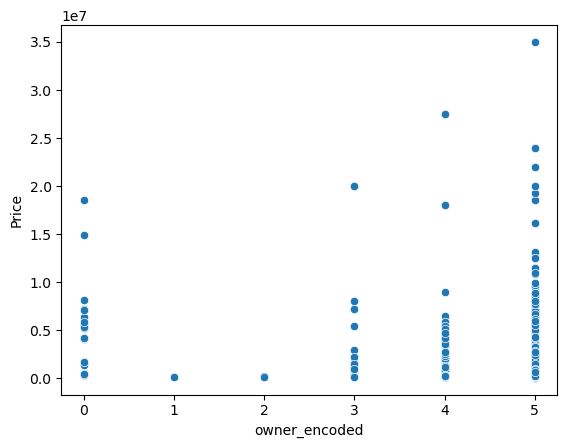

ValueError: Data must be 1-dimensional

In [330]:
for i in numerical_features:
    sns.scatterplot(x=df_new[i], y=df_new['Price'])
    plt.show()
    

In [ ]:
x=[1,2,3,4,5,10,43,24,78,65]
y=[34,54,12,31,98,68,52,56,98,76]
sns.scatterplot([x,y])

In [ ]:
print(df_new[numerical_features].dtypes)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_new[i], y=df_new['Price'])
    plt.title(f'Price vs {i}')
    plt.show()

In [ ]:
numerical_features=[
 'Year',
 'Kilometer',
 'Location',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio',
]

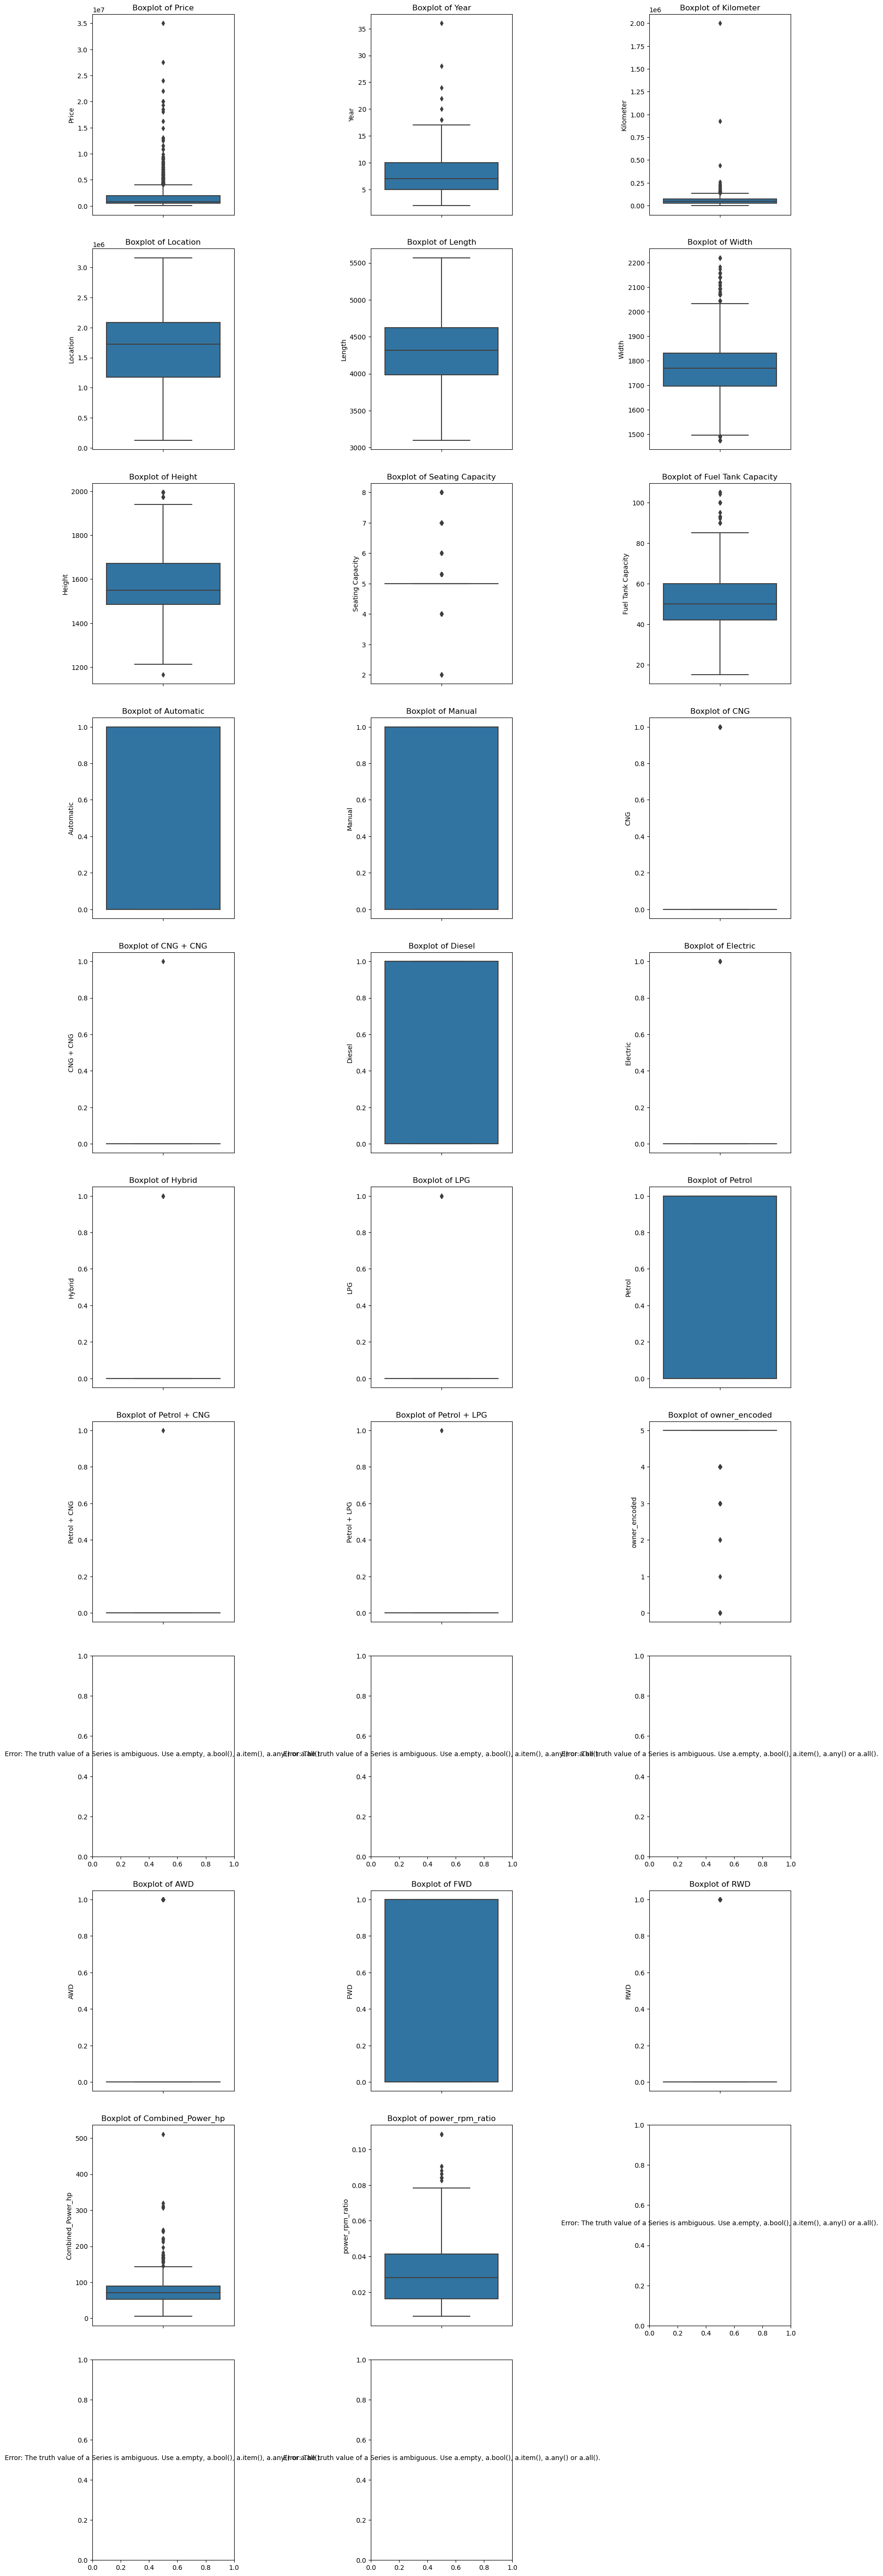

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
import math  # For ceiling calculations

# Define the number of columns for subplots
n_cols = 3  # Set the number of columns
n_rows = math.ceil(len(numerical_features) / n_cols)  # Calculate the number of rows dynamically

# Create a figure with a dynamic size based on rows and columns
plt.figure(figsize=(18, n_rows * 5))

# Loop through numerical features and create boxplots
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)  # Subplot index starts at 1
    try:
        sns.boxplot(y=df_new[col], data=df_new)
        plt.title(f'Boxplot of {col}', fontsize=12)
    except Exception as e:
        plt.text(0.5, 0.5, f'Error: {str(e)}', fontsize=10, ha='center')  # Error message in case plotting fails

# Adjust layout to prevent overlap
plt.tight_layout(pad=2.0)

# Show the plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_49904\3978407489.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))


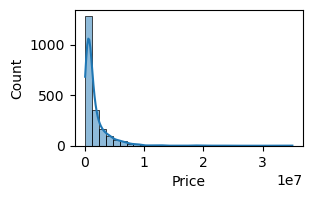

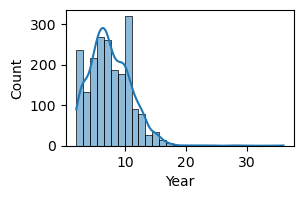

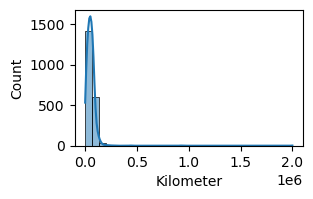

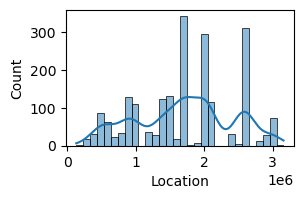

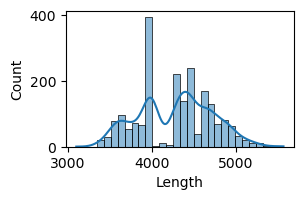

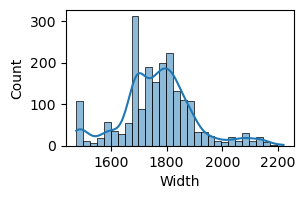

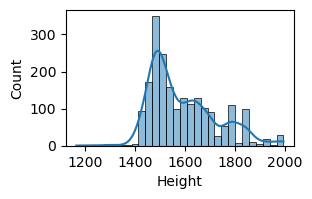

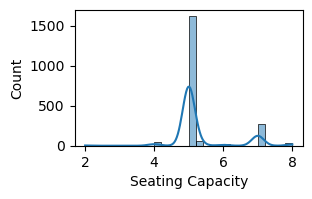

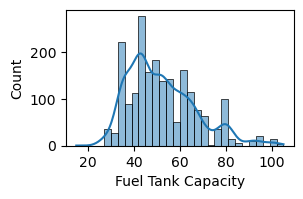

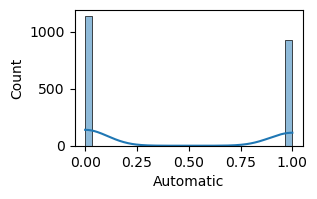

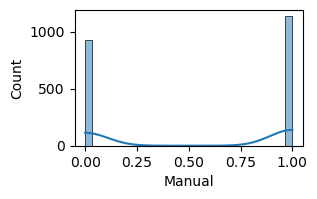

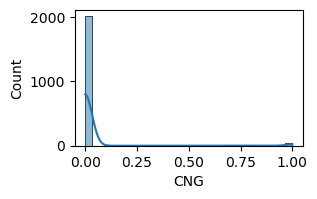

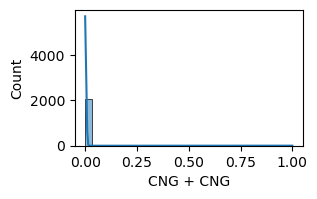

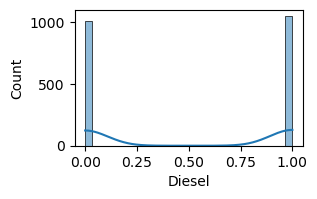

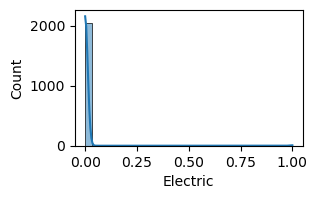

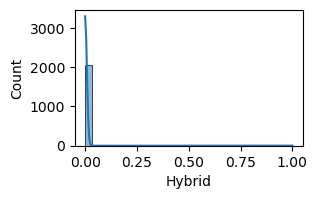

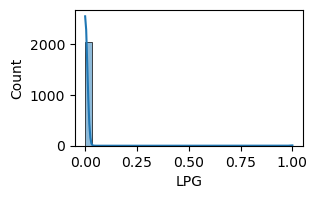

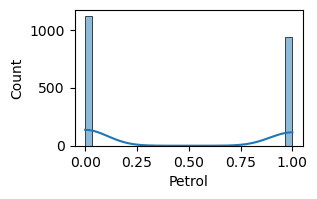

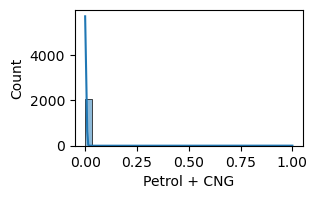

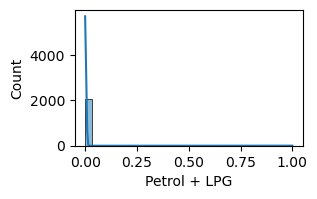

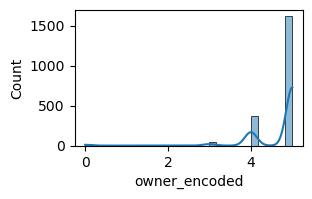

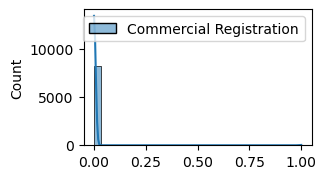

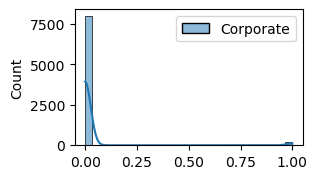

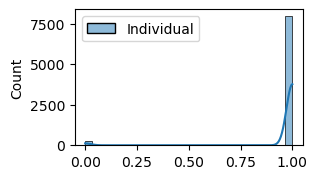

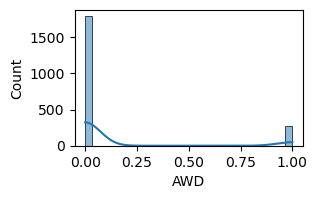

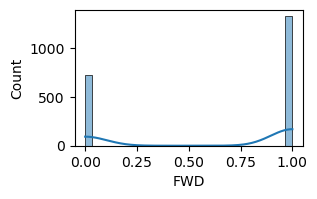

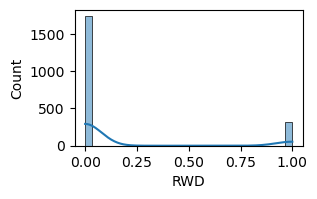

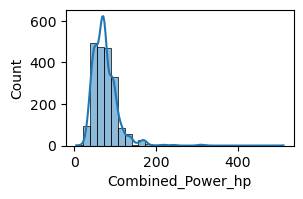

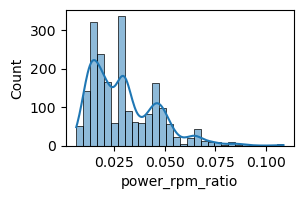

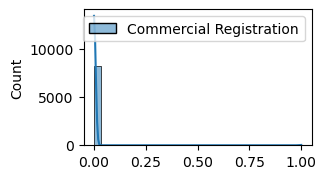

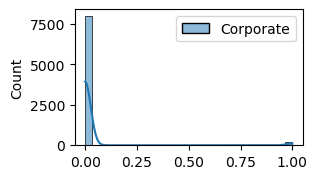

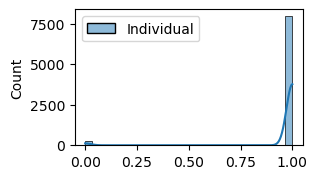

In [334]:
for i in numerical_features:
    plt.figure(figsize=(10,6))
    plt.subplot(3,3,1)
    sns.histplot(df_new[i],kde=True,bins=30)

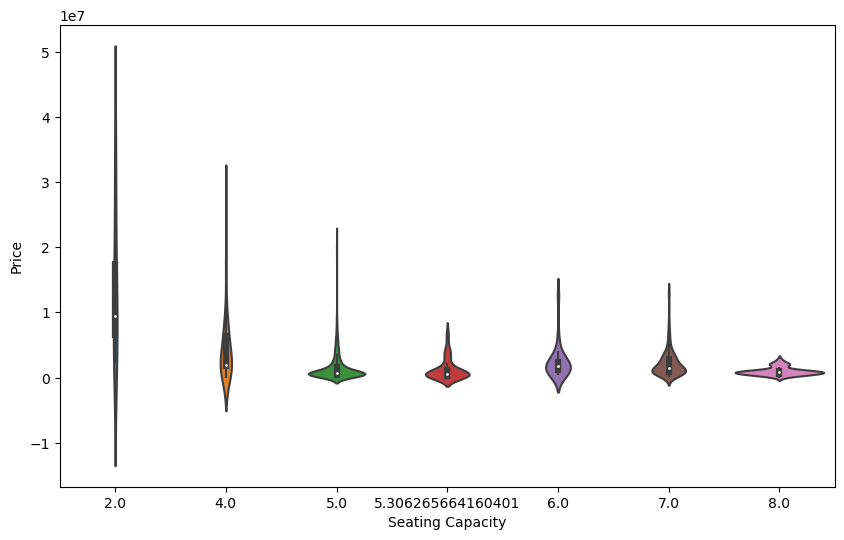

In [335]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Seating Capacity',y='Price',data=df_new)
plt.show()

# Feature Engineering

In [336]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,Corporate,Individual,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual
0,505000,7,87150,1.977764e+06,3990.0,1680.0,1505.0,5.0,35.00000,0,...,1,0,0,1,0,68.881641,0.014500,0,1,0
1,450000,10,75000,1.475745e+06,3995.0,1695.0,1555.0,5.0,42.00000,0,...,0,1,0,1,0,53.363963,0.018500,0,0,1
2,220000,13,67000,9.643333e+05,3585.0,1595.0,1550.0,5.0,35.00000,0,...,0,1,0,1,0,63.341282,0.013167,0,0,1
3,799000,5,37500,7.424000e+05,3995.0,1745.0,1510.0,5.0,37.00000,0,...,0,1,0,1,0,66.648781,0.013667,0,0,1
4,1950000,6,69000,1.721570e+06,4735.0,1830.0,1795.0,7.0,55.00000,0,...,0,1,0,0,1,67.435197,0.043529,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,8,90300,2.980400e+06,4585.0,1890.0,1785.0,7.0,70.00000,0,...,0,1,0,1,0,74.147822,0.036800,0,0,1
2055,275000,10,83000,1.507257e+06,3495.0,1550.0,1500.0,5.0,32.00000,0,...,0,1,0,1,0,42.129444,0.010000,0,0,1
2056,240000,11,73000,1.149000e+06,3795.0,1680.0,1427.0,5.0,45.00000,0,...,0,1,0,1,0,57.296044,0.011200,0,0,1
2057,4290000,6,60474,1.385207e+06,4936.0,1868.0,1479.0,5.0,65.00000,1,...,0,1,0,0,1,98.302036,0.047000,0,0,1


In [337]:
from sklearn.preprocessing import StandardScaler

In [338]:
numerical_features

['Price',
 'Year',
 'Kilometer',
 'Location',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Automatic',
 'Manual',
 'CNG',
 'CNG + CNG',
 'Diesel',
 'Electric',
 'Hybrid',
 'LPG',
 'Petrol',
 'Petrol + CNG',
 'Petrol + LPG',
 'owner_encoded',
 'Commercial Registration',
 'Corporate',
 'Individual',
 'AWD',
 'FWD',
 'RWD',
 'Combined_Power_hp',
 'power_rpm_ratio',
 'Commercial Registration',
 'Corporate',
 'Individual']

In [361]:
numerical_features=['Price',
 'Year',
 'Kilometer',
 'Location',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Automatic',
 'Manual',
 'CNG',
 'CNG + CNG',
 'Diesel',
 'Electric',
 'Hybrid',
 'LPG',
 'Petrol',
 'Petrol + CNG',
 'Petrol + LPG',
 'owner_encoded',
 'Commercial Registration',
 'Corporate',
 'Individual',
 'AWD',
 'FWD',
 'RWD',
 'Combined_Power_hp',
 'power_rpm_ratio',
 'Commercial Registration',
 'Corporate',
 'Individual']

In [362]:
scaler= StandardScaler()

In [363]:
df_new[numerical_features]=scaler.fit_transform(df_new[numerical_features])

In [364]:
df_new.corr()

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual,Volume,Distance per year
Price,1.000000,-3.113995e-01,-0.150825,0.290479,5.526676e-01,5.598695e-01,7.453035e-02,-3.824188e-02,5.624226e-01,0.476843,...,0.417658,-0.447695,0.257612,5.651558e-01,6.811430e-01,-0.024146,0.096228,-0.085427,0.279744,-9.425443e-03
Year,-0.311400,1.000000e+00,0.296547,-0.164815,-9.353423e-02,-1.851292e-01,-1.099471e-01,6.028858e-03,-6.054809e-02,-0.171883,...,-0.090118,-0.075548,-0.034013,2.460282e-02,-6.038587e-02,-0.020167,-0.031471,0.036021,-0.112094,-1.730657e-18
Kilometer,-0.150825,2.965474e-01,1.000000,-0.105969,4.747267e-02,1.737667e-02,9.313621e-02,1.246340e-01,5.541805e-02,-0.104907,...,0.000483,-0.036722,0.007502,-4.010046e-03,3.030939e-02,-0.002281,-0.028835,0.028340,0.021599,6.724869e-01
Location,0.290479,-1.648150e-01,-0.105969,1.000000,2.825975e-01,2.744885e-01,-4.258414e-02,-4.788689e-02,2.494140e-01,0.356806,...,0.136763,-0.133311,0.091389,2.616847e-01,2.712771e-01,-0.081072,0.017300,0.006741,0.093780,-3.543028e-02
Length,0.552668,-9.353423e-02,0.047473,0.282598,1.000000e+00,8.070535e-01,1.854512e-01,2.951490e-01,7.994666e-01,0.537109,...,0.353968,-0.509844,0.396878,5.960987e-01,7.985781e-01,-0.045989,0.088305,-0.071530,0.258769,9.502531e-03
Width,0.559870,-1.851292e-01,0.017377,0.274488,8.070535e-01,1.000000e+00,2.967023e-01,2.216894e-01,7.718030e-01,0.519143,...,0.491260,-0.523193,0.303397,5.632394e-01,7.590496e-01,-0.030242,0.068171,-0.056736,0.307609,1.728297e-02
Height,0.074530,-1.099471e-01,0.093136,-0.042584,1.854512e-01,2.967023e-01,1.000000e+00,6.957606e-01,3.922911e-01,-0.059612,...,0.405167,-0.434475,0.162057,4.978058e-02,2.600774e-01,0.003708,-0.025659,0.023566,0.570246,2.079773e-02
Seating Capacity,-0.038242,6.028858e-03,0.124634,-0.047887,2.951490e-01,2.216894e-01,6.957606e-01,1.000000e+00,3.113732e-01,-0.044407,...,0.146602,-0.340579,0.292372,2.573141e-02,2.180395e-01,0.005716,-0.038557,0.035370,0.304342,2.008072e-03
Fuel Tank Capacity,0.562423,-6.054809e-02,0.055418,0.249414,7.994666e-01,7.718030e-01,3.922911e-01,3.113732e-01,1.000000e+00,0.493361,...,0.522908,-0.621918,0.368540,5.645994e-01,7.813766e-01,-0.023524,0.059944,-0.050773,0.354217,3.837919e-03
Automatic,0.476843,-1.718827e-01,-0.104907,0.356806,5.371092e-01,5.191431e-01,-5.961175e-02,-4.440675e-02,4.933609e-01,1.000000,...,0.333518,-0.365721,0.211631,4.213865e-01,5.580504e-01,-0.044604,0.103335,-0.086358,0.100285,-1.349157e-02


In [365]:
df_new

,Price,Year,Kilometer,Location,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Automatic,...,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual,Volume,Distance per year
0,-0.495183,-0.170858,0.574133,0.390994,-0.668002,-0.661029,-0.647719,-0.378532,-1.157720e+00,-0.904046,...,-0.390142,0.740351,-0.429762,-0.196800,-0.941016,-0.049338,5.926450,-5.675357,-0.286013,-3.360304
1,-0.517916,0.721270,0.362268,-0.323367,-0.656519,-0.548343,-0.274331,-0.378532,-6.810738e-01,-0.904046,...,-0.390142,0.740351,-0.429762,-0.689019,-0.692449,-0.049338,-0.168735,0.176200,-0.098759,0.502264
2,-0.612986,1.613398,0.222769,-1.051093,-1.598142,-1.299581,-0.311670,-0.378532,-1.157720e+00,-0.904046,...,-0.390142,0.740351,-0.429762,-0.372539,-1.023872,-0.049338,-0.168735,0.176200,-0.647312,0.138074
3,-0.373659,-0.765609,-0.291637,-1.366898,-0.656519,-0.172724,-0.610380,-0.378532,-1.021535e+00,-0.904046,...,-0.390142,0.740351,-0.429762,-0.267626,-0.992801,-0.049338,-0.168735,0.176200,-0.069215,0.380921
4,0.102099,-0.468234,0.257644,0.026437,1.042995,0.465828,1.517933,2.093385,2.041265e-01,-0.904046,...,-0.390142,-1.350710,2.326871,-0.242681,0.862925,-0.049338,-0.168735,0.176200,0.737497,-0.550246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,-0.352579,0.126518,0.629061,1.817720,0.698499,0.916571,1.443255,2.093385,1.225512e+00,-0.904046,...,-0.390142,0.740351,-0.429762,-0.029757,0.444747,-0.049338,-0.168735,0.176200,0.924006,4.972096
2055,-0.590252,0.721270,0.501768,-0.278525,-1.804840,-1.637638,-0.685058,-0.378532,-1.361997e+00,-0.904046,...,-0.390142,0.740351,-0.429762,-1.045376,-1.220654,-0.049338,-0.168735,0.176200,-2.024808,0.695673
2056,-0.604719,1.018646,0.327393,-0.788317,-1.115847,-0.661029,-1.230205,-0.378532,-4.767968e-01,-0.904046,...,-0.390142,0.740351,-0.429762,-0.564294,-1.146084,-0.049338,-0.168735,0.176200,-0.907408,0.321400
2057,1.069324,-0.468234,0.108972,-0.452200,1.504620,0.751298,-0.841881,-0.378532,8.850499e-01,1.106138,...,-0.390142,-1.350710,2.326871,0.736411,1.078594,-0.049338,-0.168735,0.176200,-0.951677,-0.232729


In [366]:
df_new['Volume']= df_new['Length']*df_new['Width']*df_new['Height']

In [367]:
df_new.shape

(2059, 34)

In [368]:
df_new['Distance per year']= df_new['Kilometer']/df_new['Year']

In [369]:
df_new1= df_new.drop(['Length','Width','Height','Kilometer'],axis=1)

In [371]:
numerical_features=['Price',
 'Year',
 'Location',
 'Volume','Distance per year',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [372]:
numerical_features

['Price',
 'Year',
 'Location',
 'Volume',
 'Distance per year',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [373]:
Irrelevant_columns=[]
for i in numerical_features:
    corr= df_new1['Price'].corr(df_new1[i])
    if corr<0.2 and corr>-0.2:
        Irrelevant_columns.append(i)

In [374]:
Irrelevant_columns

['Distance per year', 'Seating Capacity']

In [375]:
numerical_features


['Price',
 'Year',
 'Location',
 'Volume',
 'Distance per year',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Combined_Power_hp',
 'power_rpm_ratio']

In [376]:
from sklearn.model_selection import train_test_split

In [390]:
df_y1= df_new1['Price']
df_x1= df_new1.drop(['Price'],axis=1)
x_train1,x_temp1,y_train1,y_temp1= train_test_split(df_x1,df_y1,test_size=0.3,random_state=42)
x_val1,x_test1,y_val1,y_test1= train_test_split(x_temp1,y_temp1,test_size=0.5,random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor()
rf1.fit(x_train1,y_train1)

RandomForestRegressor()

In [379]:
from sklearn.metrics import mean_squared_error

In [380]:
y_val_pred1= rf1.predict(x_val1)
mse1=mean_squared_error(y_val1,y_val_pred1)

In [381]:
mse1

0.1796297814777167

In [384]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf1, x_temp1, y_temp1, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores

In [385]:
print(f"Cross-Validation MSE Scores: {cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {cv_mse_scores.mean()}")

Cross-Validation MSE Scores: [0.35337321 0.14934723 0.1190075  1.08917377 0.15172014]
Mean Cross-Validation MSE: 0.37252437014921064


In [386]:
from sklearn.metrics import r2_score

In [392]:
r2= r2_score(y_val1,y_val_pred1)

In [393]:
r2

0.8447746099474343

In [394]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],       # Number of trees
    'max_depth': [None, 10, 20, 30, 40],                # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']           # Number of features to consider at each split
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,                # Number of iterations for searching
    cv=5,                     # 5-fold cross-validation
    verbose=2,                # Display progress
    random_state=42,
    scoring='neg_mean_squared_error',  # Evaluation metric
    n_jobs=-1                 # Use all available cores
)

# Fit the model on your training data
random_search.fit(x_temp1, y_temp1)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")

# Use the best estimator to make predictions
best_rf = random_search.best_estimator_
y_val_pred = best_rf.predict(x_val1)

# Evaluate the performance on the validation set
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val1, y_val_pred)
r2 = r2_score(y_val1, y_val_pred)

print(f"Validation MSE: {mse}")
print(f"Validation R^2: {r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\Lib\site-pa

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Cross-Validation Score: -0.35674210172881116
Validation MSE: 0.019577673586118796
Validation R^2: 0.983082137083688


In [395]:
# Predict on the test set using the best model
y_test_pred = best_rf.predict(x_test1)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R^2 for the test set
test_mse = mean_squared_error(y_test1, y_test_pred)
test_r2 = r2_score(y_test1, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")


Test MSE: 0.06444595321146944
Test R^2: 0.9498889609996354


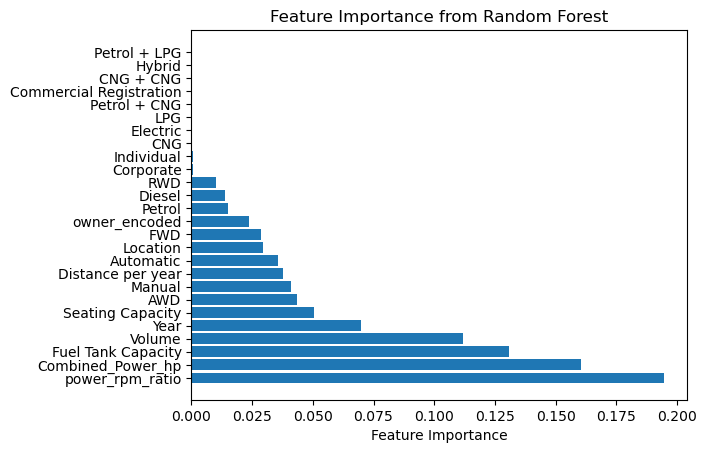

In [396]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
feature_importances = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.barh([x_temp1.columns[i] for i in sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()


In [397]:
import joblib

# Save the model to a file
joblib.dump(best_rf, "random_forest_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [398]:
! pip install streamlit

In [406]:
import pickle

# Save the trained model to a .pkl file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [407]:
df_new1.columns

Index(['Price', 'Year', 'Location', 'Seating Capacity', 'Fuel Tank Capacity',
       'Automatic', 'Manual', 'CNG', 'CNG + CNG', 'Diesel', 'Electric',
       'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG', 'Petrol + LPG',
       'owner_encoded', 'Commercial Registration', 'Corporate', 'Individual',
       'AWD', 'FWD', 'RWD', 'Combined_Power_hp', 'power_rpm_ratio',
       'Commercial Registration', 'Corporate', 'Individual', 'Volume',
       'Distance per year'],
      dtype='object')

In [454]:
print(x_train1.shape[1])  # Replace `X_train` with your training data variable


29


In [401]:
x_train1.columns

Index(['Year', 'Location', 'Seating Capacity', 'Fuel Tank Capacity',
       'Automatic', 'Manual', 'CNG', 'CNG + CNG', 'Diesel', 'Electric',
       'Hybrid', 'LPG', 'Petrol', 'Petrol + CNG', 'Petrol + LPG',
       'owner_encoded', 'Commercial Registration', 'Corporate', 'Individual',
       'AWD', 'FWD', 'RWD', 'Combined_Power_hp', 'power_rpm_ratio',
       'Commercial Registration', 'Corporate', 'Individual', 'Volume',
       'Distance per year'],
      dtype='object')

In [402]:
df_new1


,Price,Year,Location,Seating Capacity,Fuel Tank Capacity,Automatic,Manual,CNG,CNG + CNG,Diesel,...,AWD,FWD,RWD,Combined_Power_hp,power_rpm_ratio,Commercial Registration,Corporate,Individual,Volume,Distance per year
0,-0.495183,-0.170858,0.390994,-0.378532,-1.157720e+00,-0.904046,0.904046,-0.157759,-0.022043,-1.019124,...,-0.390142,0.740351,-0.429762,-0.196800,-0.941016,-0.049338,5.926450,-5.675357,-0.286013,-3.360304
1,-0.517916,0.721270,-0.323367,-0.378532,-6.810738e-01,-0.904046,0.904046,-0.157759,-0.022043,0.981235,...,-0.390142,0.740351,-0.429762,-0.689019,-0.692449,-0.049338,-0.168735,0.176200,-0.098759,0.502264
2,-0.612986,1.613398,-1.051093,-0.378532,-1.157720e+00,-0.904046,0.904046,-0.157759,-0.022043,-1.019124,...,-0.390142,0.740351,-0.429762,-0.372539,-1.023872,-0.049338,-0.168735,0.176200,-0.647312,0.138074
3,-0.373659,-0.765609,-1.366898,-0.378532,-1.021535e+00,-0.904046,0.904046,-0.157759,-0.022043,-1.019124,...,-0.390142,0.740351,-0.429762,-0.267626,-0.992801,-0.049338,-0.168735,0.176200,-0.069215,0.380921
4,0.102099,-0.468234,0.026437,2.093385,2.041265e-01,-0.904046,0.904046,-0.157759,-0.022043,0.981235,...,-0.390142,-1.350710,2.326871,-0.242681,0.862925,-0.049338,-0.168735,0.176200,0.737497,-0.550246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,-0.352579,0.126518,1.817720,2.093385,1.225512e+00,-0.904046,0.904046,-0.157759,-0.022043,0.981235,...,-0.390142,0.740351,-0.429762,-0.029757,0.444747,-0.049338,-0.168735,0.176200,0.924006,4.972096
2055,-0.590252,0.721270,-0.278525,-0.378532,-1.361997e+00,-0.904046,0.904046,-0.157759,-0.022043,-1.019124,...,-0.390142,0.740351,-0.429762,-1.045376,-1.220654,-0.049338,-0.168735,0.176200,-2.024808,0.695673
2056,-0.604719,1.018646,-0.788317,-0.378532,-4.767968e-01,-0.904046,0.904046,-0.157759,-0.022043,-1.019124,...,-0.390142,0.740351,-0.429762,-0.564294,-1.146084,-0.049338,-0.168735,0.176200,-0.907408,0.321400
2057,1.069324,-0.468234,-0.452200,-0.378532,8.850499e-01,1.106138,-1.106138,-0.157759,-0.022043,0.981235,...,-0.390142,-1.350710,2.326871,0.736411,1.078594,-0.049338,-0.168735,0.176200,-0.951677,-0.232729
